In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from xgboost import XGBClassifier
import lightgbm as lgb

In [3]:
# import requests
# import pandas as pd
# from time import sleep

# # Function to fetch qualifying data from Ergast API
# def fetch_qualifying_data(year, round_num):
#     url = f"http://ergast.com/api/f1/{year}/{round_num}/qualifying.json"
#     response = requests.get(url)
    
#     if response.status_code == 200:
#         data = response.json()
#         return data
#     else:
#         return None

# # Function to process and save qualifying data
# def get_all_qualifying_data(start_year, end_year):
#     all_qualifying_data = []
    
#     # Loop through all years and rounds
#     for year in range(start_year, end_year + 1):
#         for round_num in range(1, 23):  # Maximum of 22 rounds per season
#             print(f"Fetching data for {year}, Round {round_num}...")
#             data = fetch_qualifying_data(year, round_num)
            
#             if data and 'MRData' in data and 'RaceTable' in data['MRData']:
#                 races = data['MRData']['RaceTable']['Races']
#                 if races:
#                     for race in races:
#                         race_data = race['QualifyingResults']
#                         if race_data:
#                             for result in race_data:
#                                 race_info = {
#                                     'year': year,
#                                     'round': round_num,
#                                     'race_name': race['raceName'],
#                                     'circuit_name': race['Circuit']['circuitName'],
#                                     'driver_code': result['Driver']['code'],
#                                     'driver_name': f"{result['Driver']['givenName']} {result['Driver']['familyName']}",
#                                     'q1_time': result.get('Q1', None),
#                                     'q2_time': result.get('Q2', None),
#                                     'q3_time': result.get('Q3', None),
#                                     'position': result['position']
#                                 }
#                                 all_qualifying_data.append(race_info)
#             sleep(1)  # Be respectful to the API and avoid rate limiting

#     return all_qualifying_data

# # Fetch and save data for 2021-2024 seasons
# qualifying_data = get_all_qualifying_data(2021, 2024)


In [4]:
# df_qualifying = pd.DataFrame(qualifying_data)

# # Save the data to a CSV file
# df_qualifying.to_csv('f1_qualifying_data_2021_2024.csv', index=False)

# print("Data fetched and saved successfully.")

In [5]:
quali_data = pd.read_csv("data/f1_qualifying_data_2021_2024.csv")


quali_data.head()

,year,round,race_name,circuit_name,driver_code,driver_name,q1_time,q2_time,q3_time,position
0,2021,1,Bahrain Grand Prix,Bahrain International Circuit,VER,Max Verstappen,1:30.499,1:30.318,1:28.997,1
1,2021,1,Bahrain Grand Prix,Bahrain International Circuit,HAM,Lewis Hamilton,1:30.617,1:30.085,1:29.385,2
2,2021,1,Bahrain Grand Prix,Bahrain International Circuit,BOT,Valtteri Bottas,1:31.200,1:30.186,1:29.586,3
3,2021,1,Bahrain Grand Prix,Bahrain International Circuit,LEC,Charles Leclerc,1:30.691,1:30.010,1:29.678,4
4,2021,1,Bahrain Grand Prix,Bahrain International Circuit,GAS,Pierre Gasly,1:30.848,1:30.513,1:29.809,5


In [6]:
track_features = {
    'French Grand Prix': {'altitude': 135, 'track_speed': 'medium', 'track_corners': 'fast', 'elevation_change': 'low'},
    'Chinese Grand Prix': {'altitude': 4, 'track_speed': 'medium', 'track_corners': 'tight', 'elevation_change': 'medium'},
    'Portuguese Grand Prix': {'altitude': 200, 'track_speed': 'medium', 'track_corners': 'fast', 'elevation_change': 'high'},
    'Bahrain Grand Prix': {'altitude': 3, 'track_speed': 'medium', 'track_corners': 'tight', 'elevation_change': 'low'},
    'Saudi Arabian Grand Prix': {'altitude': 5, 'track_speed': 'high', 'track_corners': 'fast', 'elevation_change': 'low'},
    'Australian Grand Prix': {'altitude': 26, 'track_speed': 'medium', 'track_corners': 'tight', 'elevation_change': 'low'},
    'Azerbaijan Grand Prix': {'altitude': 28, 'track_speed': 'high', 'track_corners': 'tight', 'elevation_change': 'low'},
    'Miami Grand Prix': {'altitude': 1, 'track_speed': 'medium', 'track_corners': 'fast', 'elevation_change': 'low'},
    'Emilia Romagna Grand Prix': {'altitude': 63, 'track_speed': 'medium', 'track_corners': 'tight', 'elevation_change': 'high'},
    'Monaco Grand Prix': {'altitude': 0, 'track_speed': 'low', 'track_corners': 'tight', 'elevation_change': 'high'},
    'Spanish Grand Prix': {'altitude': 120, 'track_speed': 'medium', 'track_corners': 'tight', 'elevation_change': 'medium'},
    'Austrian Grand Prix': {'altitude': 673, 'track_speed': 'high', 'track_corners': 'fast', 'elevation_change': 'high'},
    'British Grand Prix': {'altitude': 165, 'track_speed': 'high', 'track_corners': 'fast', 'elevation_change': 'low'},
    'Canadian Grand Prix': {'altitude': 15, 'track_speed': 'high', 'track_corners': 'tight', 'elevation_change': 'low'},
    'Hungarian Grand Prix': {'altitude': 150, 'track_speed': 'low', 'track_corners': 'tight', 'elevation_change': 'low'},
    'Belgian Grand Prix': {'altitude': 385, 'track_speed': 'high', 'track_corners': 'fast', 'elevation_change': 'high'},
    'Dutch Grand Prix': {'altitude': 4, 'track_speed': 'medium', 'track_corners': 'fast', 'elevation_change': 'high'},
    'Italian Grand Prix': {'altitude': 142, 'track_speed': 'high', 'track_corners': 'fast', 'elevation_change': 'low'},
    'Singapore Grand Prix': {'altitude': 0, 'track_speed': 'low', 'track_corners': 'tight', 'elevation_change': 'low'},
    'Japanese Grand Prix': {'altitude': 23, 'track_speed': 'high', 'track_corners': 'fast', 'elevation_change': 'high'},
    'Qatar Grand Prix': {'altitude': 10, 'track_speed': 'high', 'track_corners': 'fast', 'elevation_change': 'low'},
    'United States Grand Prix': {'altitude': 430, 'track_speed': 'medium', 'track_corners': 'tight', 'elevation_change': 'high'},
    'Mexico City Grand Prix': {'altitude': 2240, 'track_speed': 'high', 'track_corners': 'fast', 'elevation_change': 'low'},
    'São Paulo Grand Prix': {'altitude': 800, 'track_speed': 'medium', 'track_corners': 'fast', 'elevation_change': 'high'},
    'Las Vegas Grand Prix': {'altitude': 2, 'track_speed': 'high', 'track_corners': 'fast', 'elevation_change': 'low'},
    'Abu Dhabi Grand Prix': {'altitude': 3, 'track_speed': 'medium', 'track_corners': 'tight', 'elevation_change': 'low'},
    'Turkish Grand Prix': {'altitude': 100, 'track_speed': 'medium', 'track_corners': 'fast', 'elevation_change': 'high'},
    'Styrian Grand Prix':{'altitude': 673, 'track_speed': 'high', 'track_corners': 'fast', 'elevation_change': 'high'}
}

def add_track_features(row):
    track_name = row['race_name']  
    if track_name in track_features:
        features = track_features[track_name]
        row['track_speed'] = features['track_speed']
        row['track_corners'] = features['track_corners']
        row['elevation_change'] = features['elevation_change'] 
        row['altitude'] = features['altitude']
    return row

# Apply the function to add track features
qualifying_filtered = quali_data.apply(add_track_features, axis=1)
qualifying_filtered['top5'] = qualifying_filtered['position'].apply(lambda x: 1 if x <= 5 else 0)

qualifying_filtered.head()
qualifying_filtered.tail()

,altitude,circuit_name,driver_code,driver_name,elevation_change,position,q1_time,q2_time,q3_time,race_name,round,track_corners,track_speed,year,top5
1793,3.0,Yas Marina Circuit,ALB,Alexander Albon,low,16,1:23.821,NaN,NaN,Abu Dhabi Grand Prix,24,tight,medium,2024,0
1794,3.0,Yas Marina Circuit,ZHO,Guanyu Zhou,low,17,1:23.821,NaN,NaN,Abu Dhabi Grand Prix,24,tight,medium,2024,0
1795,3.0,Yas Marina Circuit,HAM,Lewis Hamilton,low,18,1:23.887,NaN,NaN,Abu Dhabi Grand Prix,24,tight,medium,2024,0
1796,3.0,Yas Marina Circuit,COL,Franco Colapinto,low,19,1:23.912,NaN,NaN,Abu Dhabi Grand Prix,24,tight,medium,2024,0
1797,3.0,Yas Marina Circuit,DOO,Jack Doohan,low,20,1:24.105,NaN,NaN,Abu Dhabi Grand Prix,24,tight,medium,2024,0


In [7]:
def time_to_seconds(time_str):
    """
    Convert a time string in the format 'minutes:seconds' to total seconds.
    Handles both string and numeric inputs.

    Args:
        time_str (str or float): A time string in 'minutes:seconds' format or a numeric value.

    Returns:
        float: The total time in seconds, or NaN if the format is incorrect or it's already a numeric value.
    """
    # Check if the input is a string
    if isinstance(time_str, str):
        try:
            # Check if the time_str contains a colon (minutes:seconds format)
            if ':' in time_str:
                minutes, seconds = time_str.split(':')
                seconds = seconds.replace(',', '.')  # Replace comma with dot if present
                return int(minutes) * 60 + float(seconds)
            else:
                # Return NaN if the string doesn't match the expected format
                return float('nan')
        except Exception as e:
            # Return NaN if an error occurs during conversion
            print(f"Error converting time: {time_str} ({e})")
            return float('nan')
    elif isinstance(time_str, (int, float)):
        # If it's already a numeric value (in seconds), return it directly
        return float(time_str)
    else:
        # Return NaN for any other unexpected data types
        return float('nan')

qualifying_filtered.head()
#qualifying_filtered.tail()



,altitude,circuit_name,driver_code,driver_name,elevation_change,position,q1_time,q2_time,q3_time,race_name,round,track_corners,track_speed,year,top5
0,3.0,Bahrain International Circuit,VER,Max Verstappen,low,1,1:30.499,1:30.318,1:28.997,Bahrain Grand Prix,1,tight,medium,2021,1
1,3.0,Bahrain International Circuit,HAM,Lewis Hamilton,low,2,1:30.617,1:30.085,1:29.385,Bahrain Grand Prix,1,tight,medium,2021,1
2,3.0,Bahrain International Circuit,BOT,Valtteri Bottas,low,3,1:31.200,1:30.186,1:29.586,Bahrain Grand Prix,1,tight,medium,2021,1
3,3.0,Bahrain International Circuit,LEC,Charles Leclerc,low,4,1:30.691,1:30.010,1:29.678,Bahrain Grand Prix,1,tight,medium,2021,1
4,3.0,Bahrain International Circuit,GAS,Pierre Gasly,low,5,1:30.848,1:30.513,1:29.809,Bahrain Grand Prix,1,tight,medium,2021,1


In [8]:
def get_classification_time(row):
    """
    Determines the classification time based on available qualifying times.
    
    Args:
        row (pd.Series): A row containing 'q1_time', 'q2_time', 'q3_time'.
    
    Returns:
        float: The classification time.
    """
    if pd.notna(row['q3_time']):
        return row['q3_time']  # Use q3_time if available
    elif pd.notna(row['q2_time']):
        return row['q2_time']  # Use q2_time if q3_time is missing
    elif pd.notna(row['q1_time']):
        return row['q1_time']  # Use q1_time if both q3_time and q2_time are missing
    else:
        return 0  # If all times are missing, return 0

def process_qualifying_data(qualifying_df):
    """
    Processes qualifying data by calculating the classification time for each row.
    
    Args:
        qualifying_df (pd.DataFrame): DataFrame containing the qualifying data with columns 'q1_time', 'q2_time', 'q3_time'.
    
    Returns:
        pd.DataFrame: DataFrame with a new column 'classification_time'.
    """
    # Apply the get_classification_time function to each row to calculate the classification_time
    qualifying_df['classification_time'] = qualifying_df.apply(get_classification_time, axis=1)
    
    return qualifying_df

qualifying_filtered = process_qualifying_data(qualifying_filtered)

qualifying_filtered['q1_time'] = qualifying_filtered['q1_time'].apply(time_to_seconds)
qualifying_filtered['q2_time'] = qualifying_filtered['q2_time'].apply(time_to_seconds)
qualifying_filtered['q3_time'] = qualifying_filtered['q3_time'].apply(time_to_seconds)
qualifying_filtered['classification_time'] = qualifying_filtered['classification_time'].apply(time_to_seconds)

qualifying_filtered.tail()

,altitude,circuit_name,driver_code,driver_name,elevation_change,position,q1_time,q2_time,q3_time,race_name,round,track_corners,track_speed,year,top5,classification_time
1793,3.0,Yas Marina Circuit,ALB,Alexander Albon,low,16,83.821,NaN,NaN,Abu Dhabi Grand Prix,24,tight,medium,2024,0,83.821
1794,3.0,Yas Marina Circuit,ZHO,Guanyu Zhou,low,17,83.821,NaN,NaN,Abu Dhabi Grand Prix,24,tight,medium,2024,0,83.821
1795,3.0,Yas Marina Circuit,HAM,Lewis Hamilton,low,18,83.887,NaN,NaN,Abu Dhabi Grand Prix,24,tight,medium,2024,0,83.887
1796,3.0,Yas Marina Circuit,COL,Franco Colapinto,low,19,83.912,NaN,NaN,Abu Dhabi Grand Prix,24,tight,medium,2024,0,83.912
1797,3.0,Yas Marina Circuit,DOO,Jack Doohan,low,20,84.105,NaN,NaN,Abu Dhabi Grand Prix,24,tight,medium,2024,0,84.105


In [9]:
qualifying_filtered.to_csv('model_predictions.csv',index = False)

In [10]:
qualifying_filtered.tail()

,altitude,circuit_name,driver_code,driver_name,elevation_change,position,q1_time,q2_time,q3_time,race_name,round,track_corners,track_speed,year,top5,classification_time
1793,3.0,Yas Marina Circuit,ALB,Alexander Albon,low,16,83.821,NaN,NaN,Abu Dhabi Grand Prix,24,tight,medium,2024,0,83.821
1794,3.0,Yas Marina Circuit,ZHO,Guanyu Zhou,low,17,83.821,NaN,NaN,Abu Dhabi Grand Prix,24,tight,medium,2024,0,83.821
1795,3.0,Yas Marina Circuit,HAM,Lewis Hamilton,low,18,83.887,NaN,NaN,Abu Dhabi Grand Prix,24,tight,medium,2024,0,83.887
1796,3.0,Yas Marina Circuit,COL,Franco Colapinto,low,19,83.912,NaN,NaN,Abu Dhabi Grand Prix,24,tight,medium,2024,0,83.912
1797,3.0,Yas Marina Circuit,DOO,Jack Doohan,low,20,84.105,NaN,NaN,Abu Dhabi Grand Prix,24,tight,medium,2024,0,84.105


In [11]:
numerical_cols = ['altitude', 'classification_time', 'q1_time', 'q2_time', 'q3_time']
categorical_cols = ['circuit_name', 'driver_code', 'driver_name', 'race_name', 'track_corners']
ordinal_cols = ['track_speed','elevation_change']
target_col = 'top5'

track_speed_categories = ['low','medium','high']
elevation_change_categories = ['low','medium','high']


numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), \
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[track_speed_categories, elevation_change_categories]))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('ord', ordinal_pipeline, ordinal_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

X = qualifying_filtered.drop(columns=[target_col])
y = qualifying_filtered[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train_preprocessed, y_train)

y_pred_log_reg = log_reg.predict(X_test_preprocessed)

log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_report = classification_report(y_test, y_pred_log_reg)

print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Logistic Regression Classification Report:\n", log_reg_report)


Logistic Regression Accuracy: 0.7861111111111111
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       273
           1       0.56      0.53      0.54        87

    accuracy                           0.79       360
   macro avg       0.71      0.70      0.70       360
weighted avg       0.78      0.79      0.78       360



In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_preprocessed, y_train)

y_pred_rf = rf_model.predict(X_test_preprocessed)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_report)




Random Forest Accuracy: 0.8333333333333334
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       273
           1       0.68      0.57      0.62        87

    accuracy                           0.83       360
   macro avg       0.78      0.75      0.76       360
weighted avg       0.83      0.83      0.83       360



In [14]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

xgb_model = xgb.XGBClassifier(random_state=42)

xgb_model.fit(X_train_preprocessed, y_train)

y_pred_xgb = xgb_model.predict(X_test_preprocessed)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_report = classification_report(y_test, y_pred_xgb)

print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:\n", xgb_report)



XGBoost Accuracy: 0.8388888888888889
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       273
           1       0.66      0.69      0.67        87

    accuracy                           0.84       360
   macro avg       0.78      0.79      0.78       360
weighted avg       0.84      0.84      0.84       360



In [15]:
y_train.value_counts()


top5
0    1075
1     363
Name: count, dtype: int64

In [16]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

baseline_model = DummyClassifier(strategy='most_frequent', random_state=42)

baseline_model.fit(X_train_preprocessed, y_train)

y_pred_baseline = baseline_model.predict(X_test_preprocessed)

baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_report = classification_report(y_test, y_pred_baseline)

print("Baseline Accuracy:", baseline_accuracy)
print("Baseline Classification Report:\n", baseline_report)


Baseline Accuracy: 0.7583333333333333
Baseline Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       273
           1       0.00      0.00      0.00        87

    accuracy                           0.76       360
   macro avg       0.38      0.50      0.43       360
weighted avg       0.58      0.76      0.65       360



c:\Users\aryas\miniconda3\envs\cpsc_330_group_project\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aryas\miniconda3\envs\cpsc_330_group_project\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aryas\miniconda3\envs\cpsc_330_group_project\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]  # To address class imbalance
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train_preprocessed, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.8497701316298876


In [18]:
qualifying_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   altitude             1778 non-null   float64
 1   circuit_name         1798 non-null   object 
 2   driver_code          1798 non-null   object 
 3   driver_name          1798 non-null   object 
 4   elevation_change     1778 non-null   object 
 5   position             1798 non-null   int64  
 6   q1_time              1778 non-null   float64
 7   q2_time              1334 non-null   float64
 8   q3_time              878 non-null    float64
 9   race_name            1798 non-null   object 
 10  round                1798 non-null   int64  
 11  track_corners        1778 non-null   object 
 12  track_speed          1778 non-null   object 
 13  year                 1798 non-null   int64  
 14  top5                 1798 non-null   int64  
 15  classification_time  1798 non-null   f

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

best_rf_model = RandomForestClassifier(
    class_weight=None,
    max_depth=None,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=200,
    random_state=42
)

best_rf_model.fit(X_train_preprocessed, y_train)

y_pred_rf_best = best_rf_model.predict(X_test_preprocessed)

best_rf_accuracy = accuracy_score(y_test, y_pred_rf_best)
best_rf_report = classification_report(y_test, y_pred_rf_best)

print("Best Random Forest Accuracy:", best_rf_accuracy)
print("Best Random Forest Classification Report:\n", best_rf_report)


Best Random Forest Accuracy: 0.8305555555555556
Best Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       273
           1       0.71      0.51      0.59        87

    accuracy                           0.83       360
   macro avg       0.78      0.72      0.74       360
weighted avg       0.82      0.83      0.82       360



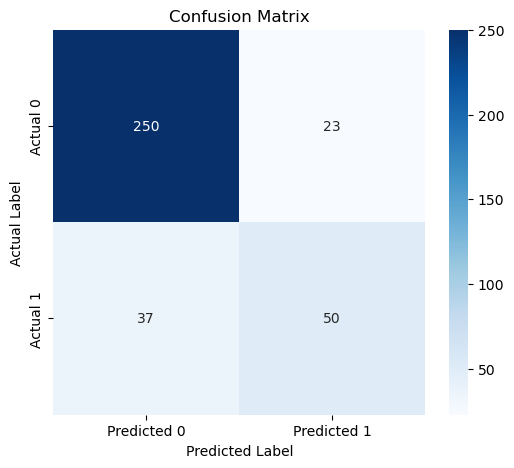

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


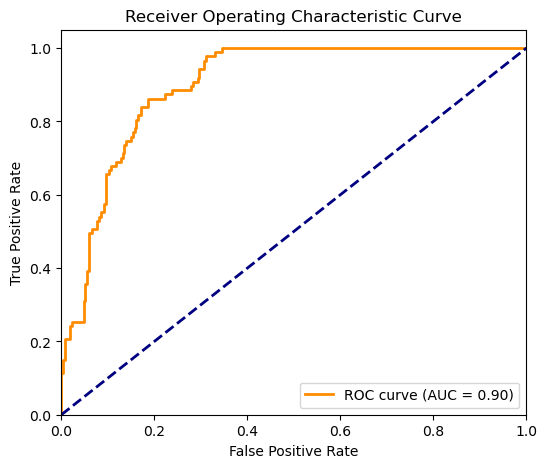

In [24]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, best_rf_model.predict_proba(X_test_preprocessed)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()


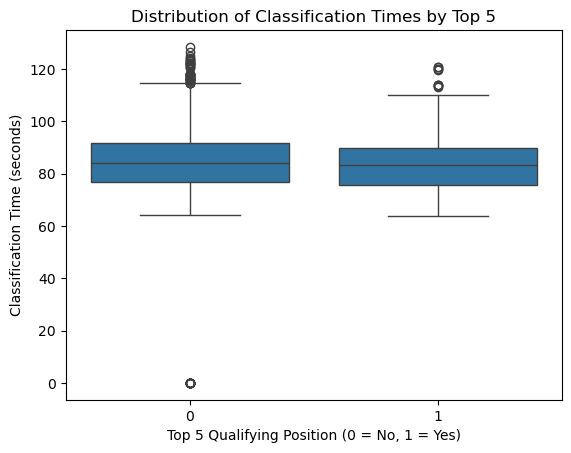

In [25]:
# Visualization 1: Distribution of classification times
sns.boxplot(x='top5', y='classification_time', data=qualifying_filtered)
plt.title("Distribution of Classification Times by Top 5")
plt.xlabel("Top 5 Qualifying Position (0 = No, 1 = Yes)")
plt.ylabel("Classification Time (seconds)")
plt.show()
